In [6]:
from __future__ import division
import xgboost as xgb
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0it [00:00, ?it/s]


In [67]:
df_train = pd.read_csv("./old/train_data.csv")
df_test = pd.read_csv("./old/test_data.csv")

In [2]:
def collate_similar_feats(df):
    
    sports_feats = ["genre_Athletics" , "genre_Badminton" , "genre_Boxing" , "genre_Cricket" , "genre_Football" , "genre_Formula1" , "genre_FormulaE" , "genre_Hockey" , "genre_IndiaVsSa" , "genre_Kabaddi" , "genre_Sport" , "genre_Swimming" , "genre_Table Tennis" , "genre_Tennis" , "genre_Volleyball"]
    df["generated_sports"] = 0
    
    positive_feats = ["genre_Comedy", "genre_Drama", "genre_Family", "genre_Reality", "genre_Romance", "genre_TalkShow", "genre_Thriller"]
    df["generated_positive"] = 0

    remaining_genres = []
    
    for i in df.columns:
        if "genre_" in i and i not in sports_feats + positive_feats:
#             df.drop(i, axis = 1, inplace = True)
            remaining_genres.append(i)
    
#     celeb_feats = ["genre_TalkShow", "genre_Reality", "genre_Awards"]
#     df["generated_celeb"] = 0

#     drama_feats = ["genre_Drama", "genre_Romance", "genre_Family"]
#     df["generated_drama"] = 0

#     science_feats = ["genre_Documentary", "genre_Science", "genre_Wildlife"]
#     df["generated_science"] = 0

#     action_feats = ["genre_Action", "genre_Thriller"]
#     df["generated_action"] = 0

    for i in sports_feats:
        df["generated_sports"]  = df["generated_sports"] + df[i]
        df.drop(i, axis = 1, inplace = True)
    
    for i in positive_feats:
        df["generated_positive"]  = df["generated_positive"] + df[i]
        df.drop(i, axis = 1, inplace = True)

    sum_wt = sum([df[i] for i in remaining_genres])
    sum_wt += df["generated_sports"] + df["generated_positive"]
    
    df["generated_sports_ratio"] = df["generated_sports"]/sum_wt    
    df["generated_positive_ratio"] = df["generated_positive"]/sum_wt
    
    for i in remaining_genres:
        df[i+"_ratio"] = df[i]/sum_wt
            
#     for i in celeb_feats:
#         df["generated_celeb"]  = df["generated_celeb"] + df[i]
#         df.drop(i, axis = 1, inplace = True)
#     df["celeb_ratio"] = df["generated_celeb"]/df["sum_wt"]
# #     df["generated_celeb"] = (df["generated_celeb"] > 0).astype(int)

#     for i in drama_feats:
#         df["generated_drama"]  = df["generated_drama"] + df[i]
#         df.drop(i, axis = 1, inplace = True)
#     df["drama_ratio"] = df["generated_drama"]/df["sum_wt"]
# #     df["generated_drama"] = (df["generated_drama"] > 0).astype(int)

#     for i in science_feats:
#         df["generated_science"]  = df["generated_science"] + df[i]
#         df.drop(i, axis = 1, inplace = True)
#     df["science_ratio"] = df["generated_science"]/df["sum_wt"]
# #     df["generated_science"] = (df["generated_science"] > 0).astype(int)

#     for i in action_feats:
#         df["generated_action"]  = df["generated_action"] + df[i]
#         df.drop(i, axis = 1, inplace = True)
#     df["action_ratio"] = df["generated_action"]/df["sum_wt"]
# #     df["generated_action"] = (df["generated_action"] > 0).astype(int)

    return df

In [3]:
def collate_tod_feats(df):
    
#     late_night_feats = ["tod_0", "tod_1", "tod_2", "tod_3", "tod_4", "tod_5"]
#     df["generated_late_night"] = 0
    
#     morning_feats = ["tod_6", "tod_7", "tod_8", "tod_9", "tod_10", "tod_11"]    
#     df["generated_morning"] = 0
    
#     afternoon_feats = ["tod_12", "tod_13", "tod_14", "tod_15", "tod_16", "tod_17"]    
#     df["generated_afternoon"] = 0
    
#     evening_feats = [ "tod_18", "tod_19", "tod_20", "tod_21", "tod_22", "tod_23"]    
#     df["generated_evening"] = 0

    positive_tod = ["tod_1", "tod_9", "tod_10", "tod_11", "tod_12", "tod_13", "tod_17", "tod_18", "tod_19", "tod_20", "tod_21"]
    df["positive_tod"] = 0
    
    super_positive_tod = ["tod_0", "tod_14", "tod_15", "tod_16", "tod_22", "tod_23"]
    df["super_positive_tod"] = 0
    
    remaining_tod = []
    
    for i in df.columns:
        if "tod_" in i and i not in positive_tod + super_positive_tod:
            remaining_tod.append(i)

    for i in positive_tod:
        df["positive_tod"] += df[i]
        df.drop(i, axis = 1, inplace = True)

    for i in super_positive_tod:
        df["super_positive_tod"] += df[i]
        df.drop(i, axis = 1, inplace = True)

    sum_wt = sum([df[i] for i in remaining_tod])
    sum_wt += df["positive_tod"] + df["super_positive_tod"]

    df["positive_tod_ratio"] = df["positive_tod"]/sum_wt
    df["super_positive_tod_ratio"] = df["super_positive_tod"]/sum_wt
#     df["indifferent_tod"] = 1 - df["positive_tod"] - df["super_positive_tod"]
                                                       
    for i in remaining_tod:
        df.drop(i, axis = 1, inplace = True)
                        
#     for i in late_night_feats:
#         df["generated_late_night"]  = df["generated_late_night"] + df[i]
#         df.drop(i, axis = 1, inplace = True)

#     for i in morning_feats:
#         df["generated_morning"]  = df["generated_morning"] + df[i]
#         df.drop(i, axis = 1, inplace = True)

#     for i in afternoon_feats:
#         df["generated_afternoon"]  = df["generated_afternoon"] + df[i]
#         df.drop(i, axis = 1, inplace = True)

#     for i in evening_feats:
#         df["generated_evening"]  = df["generated_evening"] + df[i]
#         df.drop(i, axis = 1, inplace = True)

#     sum_time_wt = df_train.generated_late_night + df_train.generated_morning + df_train.generated_afternoon + df_train.generated_evening

#     df["late_night_ratio"] = df["generated_late_night"]/sum_time_wt
#     df["morning_ratio"] = df["generated_morning"]/sum_time_wt
#     df["afternoon_ratio"] = df["generated_afternoon"]/sum_time_wt
#     df["evening_ratio"] = df["generated_evening"]/sum_time_wt
    
    return df

In [4]:
def collate_weekend_weekday(df):
    
#     positive_feats = ["dow_1", "dow_2", "dow_3"]
#     df["positive_day"] = 0

#     negative_feats = ["dow_4", "dow_7"]
#     df["negative_day"] = 0

    weekday_feats = ["dow_1", "dow_2", "dow_3", "dow_4", "dow_5", "dow_6", "dow_7"]
    sum_wt = sum([df[i] for i in weekday_feats])
    df["dow_7"] = df["dow_7"]/sum_wt
    
    for i in weekday_feats:
        if i != "dow_7":
#             df[i] = df[i]/sum_wt
            df.drop(i, axis = 1, inplace = True)
        
#     for i in positive_feats:
#         df["positive_day"] += df[i]
#         df[i] = df[i]/sum_wt
        
#     for i in negative_feats:
#         df["negative_day"] += df[i]
#         df[i] = df[i]/sum_wt
# #         df.drop(i, axis = 1, inplace = True)
        
#     df["positive_perc"] = df["positive_day"]/(df["positive_day"] + df["negative_day"])  

#     try:
#         df["positive_negative_diff"] = (df["positive_day"] - df["negative_day"])/df["negative_day"]
#     except:
#         df["positive_negative_diff"] = 1
            
#     for i in weekday_feats:
#         df[i] = df[i]/sum_wt
        
    return df

In [23]:
title_wt_dict = {}

def title_avg(row):
    
    for title in row.titles.split(","):
        
        try: #to ignore blanks
            title_name, title_wt = title.split(":")
            title_wt_dict.setdefault(str(title_name), []).append(int(title_wt))
        except:
            pass
    
train_data = pd.read_json('train_data.json',orient="index")
train_data.progress_apply(title_avg, axis = 1)
%reset_selective -f train_data

test_data = pd.read_json('test_data.json',orient="index")
test_data.progress_apply(title_avg, axis = 1)
%reset_selective -f test_data



  0%|          | 0/6 [00:00<?, ?it/s]

1035it [00:00, 10348.13it/s]         

2254it [00:00, 10837.97it/s]

3300it [00:00, 10720.32it/s]

4396it [00:00, 10789.52it/s]

5370it [00:00, 10450.99it/s]

6555it [00:00, 10834.73it/s]

7569it [00:00, 10615.81it/s]

8705it [00:00, 10825.47it/s]

9763it [00:00, 10748.93it/s]

10860it [00:01, 10814.28it/s]

12060it [00:01, 11144.24it/s]

13159it [00:01, 11048.39it/s]

14324it [00:01, 11221.92it/s]

15440it [00:01, 10951.81it/s]

16532it [00:01, 10938.80it/s]

17624it [00:01, 10694.62it/s]

18730it [00:01, 10800.35it/s]

19945it [00:01, 11172.03it/s]

21066it [00:01, 10816.08it/s]

22153it [00:02, 10286.89it/s]

23191it [00:02, 10164.74it/s]

24214it [00:02, 10183.40it/s]

25247it [00:02, 10225.09it/s]

26273it [00:02, 9763.92it/s] 

27362it [00:02, 10076.01it/s]

28377it [00:02, 9680.47it/s] 

29428it [00:02, 9900.12it/s]

30426it [00:02, 9626.85it/s]

31494it [00:02, 9919.33it/s]

32588it [00:03, 10204.61it/s]

33690it [00:03, 10435.06it/s]

3

30066it [00:02, 9959.89it/s]

31173it [00:03, 10268.14it/s]

32232it [00:03, 10361.13it/s]

33271it [00:03, 9972.07it/s] 

34274it [00:03, 9647.09it/s]

35413it [00:03, 10108.06it/s]

36434it [00:03, 10000.25it/s]

37499it [00:03, 10185.06it/s]

38524it [00:03, 10007.61it/s]

39569it [00:03, 10135.45it/s]

40587it [00:04, 9401.67it/s] 

41676it [00:04, 9803.54it/s]

42804it [00:04, 10203.94it/s]

43839it [00:04, 10075.27it/s]

44903it [00:04, 10235.87it/s]

46038it [00:04, 10545.71it/s]

47101it [00:04, 10456.28it/s]

48153it [00:04, 10220.23it/s]

49181it [00:04, 10069.78it/s]

50242it [00:04, 10225.03it/s]

51282it [00:05, 10273.94it/s]

52312it [00:05, 9900.55it/s] 

53307it [00:05, 9832.71it/s]

54519it [00:05, 10422.75it/s]

55574it [00:05, 10180.75it/s]

56678it [00:05, 10423.64it/s]

57731it [00:05, 10453.09it/s]

58799it [00:05, 10518.99it/s]

59924it [00:05, 10726.77it/s]

61001it [00:05, 10574.72it/s]

62106it [00:06, 10710.21it/s]

63180it [00:06, 10374.33it/s]

64222it [00:

In [33]:
title_segment_dict = {}

def title_segment_avg(row):
    
    for title in row.titles.split(","):
        
        try: #to ignore blanks
            title_name, title_wt = title.split(":")
            title_segment_dict.setdefault(str(title_name), []).append(int(title_wt))
        except:
            pass

train_data = pd.read_json('train_data.json',orient="index")
train_data[train_data.segment == "pos"].progress_apply(title_segment_avg, axis = 1)
%reset_selective -f train_data



  0%|          | 0/6 [00:00<?, ?it/s]

1219it [00:00, 12189.98it/s]         

2660it [00:00, 12780.08it/s]

3894it [00:00, 12638.30it/s]

5200it [00:00, 12709.69it/s]

6473it [00:00, 12711.36it/s]

7619it [00:00, 12303.96it/s]

8811it [00:00, 12185.08it/s]

10056it [00:00, 12261.48it/s]

11390it [00:00, 12564.81it/s]

12787it [00:01, 12954.79it/s]

14054it [00:01, 12691.95it/s]

15255it [00:01, 12608.63it/s]

In [65]:
def collective_title_stats(row):
    
    for title in row.titles.split(","):
        
        try:
            title_name, title_wt = title.split(":")

            if str(title_name) in title_segment_dict:
                segment_view_ratio = len(title_segment_dict[str(title_name)])/len(title_wt_dict[str(title_name)])
            else:
                segment_view_ratio = 0
        except:
            segment_view_ratio = 0
            
    return pd.Series({"segment_view_ratio":segment_view_ratio})

with open('train_title.pkl', 'rb') as handle:
    train_title = pickle.load(handle)
with open('test_title.pkl', 'rb') as handle:
    test_title = pickle.load(handle)    

train_data = pd.read_json('train_data.json',orient="index")
train_collective_title_stats = train_data.progress_apply(collective_title_stats, axis = 1)
# %reset_selective -f train_data
train_collective_title_stats.index = train_title.index
train_title = pd.concat([train_title, train_collective_title_stats], axis = 1)

test_data = pd.read_json('test_data.json',orient="index")
test_collective_title_stats = test_data.progress_apply(collective_title_stats, axis = 1)
# %reset_selective -f test_data
test_collective_title_stats.index = test_title.index
test_title = pd.concat([test_title, test_collective_title_stats], axis = 1)

with open("train_title.pkl", "wb") as handle:
    pickle.dump(train_title, handle)
with open("test_title.pkl", "wb") as handle:
    pickle.dump(test_title, handle)

In [29]:
def title_analysis(row):
    
    title_dict = {}
    
    for title in row.titles.split(","):

        try: #to ignore blanks

            title_name, title_wt = title.split(":")
            title_dict[str(title_name)] = int(title_wt)
                            
        except:
            pass

    if sum(title_dict.values()) > 0:
        titles_gt_600 = sum( x >= 600 for x in title_dict.values() )/len(title_dict)
        titles_mean = np.mean(title_dict.values())
        titles_median = np.median(title_dict.values())    
        titles_max = max(title_dict.values())    
        titles_max_perc = titles_max/sum(title_dict.values())

        return pd.Series({
            "titles_gt_600": titles_gt_600,
            "titles_mean": titles_mean,
            "titles_median": titles_median,
            "titles_max": titles_max,
            "titles_max_perc": titles_max_perc,
        })
    else:
        return pd.Series({
            "titles_gt_600": 0,
            "titles_mean": 0,
            "titles_median": 0,
            "titles_max": 0,
            "titles_max_perc": 0
        })
    
train_data = pd.read_json('train_data.json',orient="index")
train_title = train_data.progress_apply(title_analysis, axis = 1)
%reset_selective -f train_data
train_title.index = df_train.index

test_data = pd.read_json('test_data.json',orient='index')
test_title = test_data.progress_apply(title_analysis, axis = 1)
%reset_selective -f test_data
test_title.index = df_test.index

In [68]:
# with open("train_title.pkl", "wb") as handle:
#     pickle.dump(train_title, handle)
# with open("test_title.pkl", "wb") as handle:
#     pickle.dump(test_title, handle)

with open('train_title.pkl', 'rb') as handle:
    train_title = pickle.load(handle)
with open('test_title.pkl', 'rb') as handle:
    test_title = pickle.load(handle)    

df_train = pd.concat([df_train, train_title], axis = 1)
df_test = pd.concat([df_test, test_title], axis = 1)

In [69]:
df_train = collate_similar_feats(df_train)
df_test = collate_similar_feats(df_test)

In [70]:
df_train = collate_tod_feats(df_train)
df_test = collate_tod_feats(df_test)

In [71]:
df_train = collate_weekend_weekday(df_train)
df_test = collate_weekend_weekday(df_test)

In [72]:
df_train.to_csv("./new/train_data.csv", index = False)
df_test.to_csv("./new/test_data.csv", index = False)

In [73]:
import seaborn as sns
corr = df_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

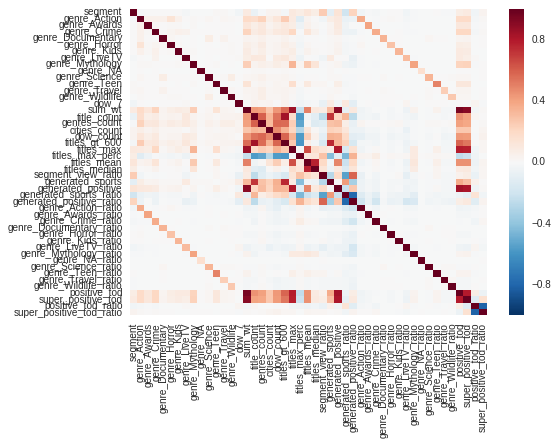

In [74]:
import matplotlib.pyplot as plt
plt.show()

In [72]:
np.mean(df_train[df_train.segment == 0].title_count)

12.115478091423313

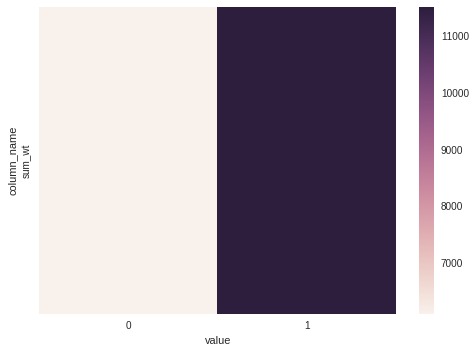

In [89]:
# cols = ["generated_sports", "generated_celeb", "generated_drama"]
# cols = [i for i in df_train.columns if "dow" in i]
# cols.remove("dow_count")
cols = ["sum_wt"]

non_segment_means = []
segment_means = []
for i in cols:
    non_segment_means.append(np.mean(df_train[df_train.segment == 0][i]))    
    segment_means.append(np.mean(df_train[df_train.segment == 1][i]))

new_df = pd.DataFrame({"column_name":cols+cols, "value":[0]*len(cols) + [1]*len(cols), "y_mean":non_segment_means + segment_means})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

# plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.show()

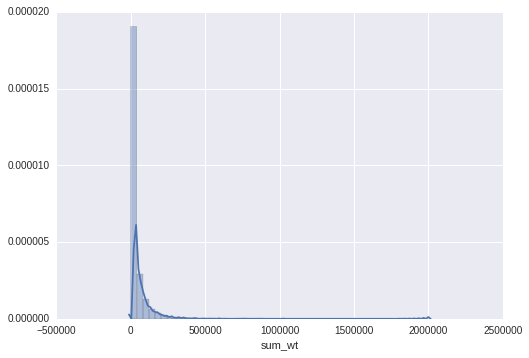

In [29]:
sns.distplot(df_train[df_train.segment == 1].sum_wt)
plt.show()

In [35]:
df_train[df_train.segment == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
segment,15255.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
genre_Action,15255.0,1.873776e-02,0.105561,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_Awards,15255.0,4.352549e-03,0.047546,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_Crime,15255.0,1.983909e-02,0.114069,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_Documentary,15255.0,3.483273e-04,0.014432,0.000000,0.000000,0.000000,0.000000,9.808612e-01
genre_Horror,15255.0,4.110050e-03,0.051497,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_Kids,15255.0,4.130145e-03,0.048697,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_LiveTV,15255.0,5.867077e-03,0.057672,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_Mythology,15255.0,1.508357e-02,0.106242,0.000000,0.000000,0.000000,0.000000,1.000000e+00
genre_NA,15255.0,1.024254e-06,0.000127,0.000000,0.000000,0.000000,0.000000,1.562500e-02
